In [1]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size())
# x, y = Variable(x), Variable(y)  # deprecated in Pytorch 0.4.

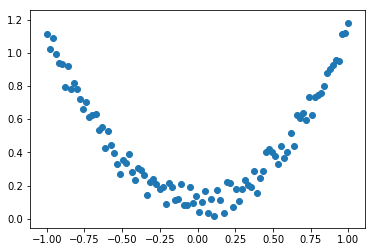

In [3]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [4]:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        # hidden layer (input_dim, output_dim)
        self.hidden = torch.nn.Linear(n_features, n_hidden)
        # output layer (input_dim, output_dim)
        self.predict = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        # build the NN
        h1 = F.relu(self.hidden(x)) # add af here
        y = self.predict(h1)
        return y

In [5]:
net = Net(1, 10, 1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [6]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.1
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [7]:
loss_func = torch.nn.MSELoss()
print(loss_func)

MSELoss()


In [8]:
plt.ion()

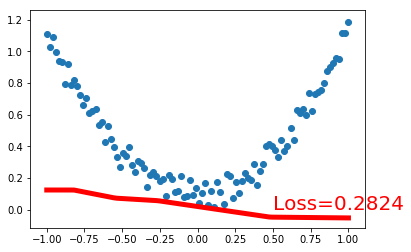

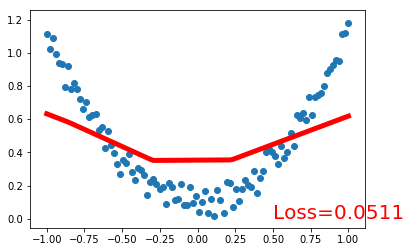

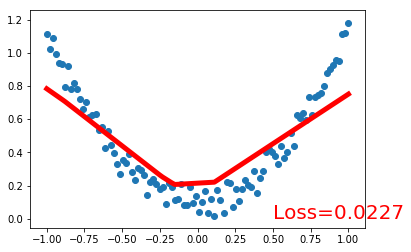

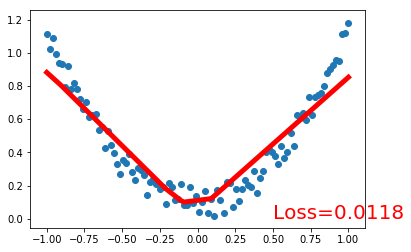

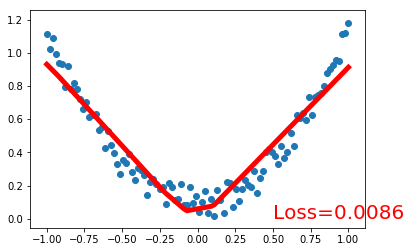

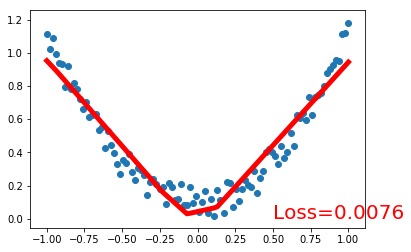

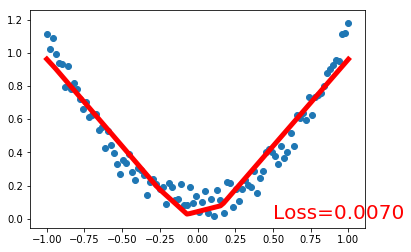

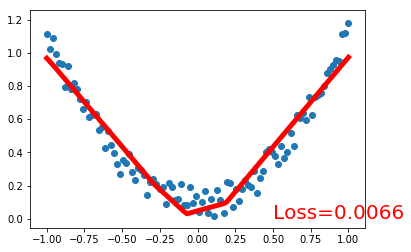

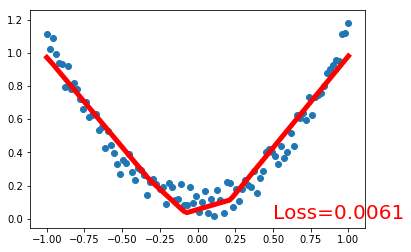

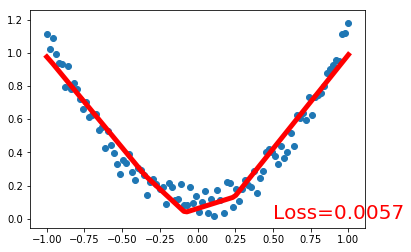

In [9]:
for i in range(500):
    y_hat = net(x)  # input x to the NN
    loss = loss_func(y_hat, y)
    optimizer.zero_grad()  # init gradients
    loss.backward()  # compute gradients
    optimizer.step()  # run optimizer with lr=0.5
    
    if i % 50 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_hat.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()

In [10]:
torch.save(net, '304net.pkl')  # save entire net
torch.save(net.state_dict(), '304net_params.pkl')   # save only the parameters

//anaconda/envs/py3/lib/python3.6/site-packages/torch/serialization.py:193: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


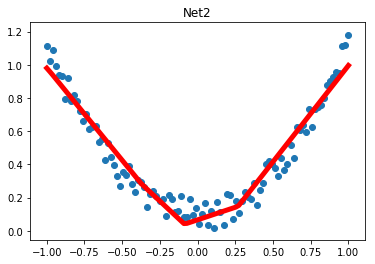

In [12]:
# restore method 1
net2 = torch.load('304net.pkl')
prediction = net2(x)

# plot result
plt.title('net')
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

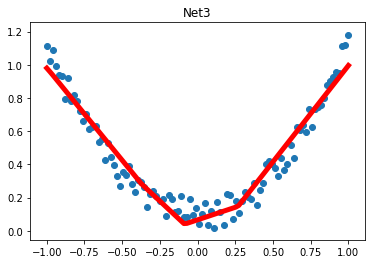

In [14]:
# restore method 2
net3 = Net(1, 10, 1)
net3.load_state_dict(torch.load('304net_params.pkl'))
prediction = net3(x)

# plot result
plt.title('Net3')
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
plt.show()